# Tropical Cyclone
---

An the end of February 2025, the tropical cyclone Honde affected the southern coast of Madagascar. It caused very heavy rainfall and strong winds. <br>

This example shows analysis of the selected parameter:
- [`tc`](https://codes.ecmwf.int/grib/param-db/129) tropical cyclone trajectory of the **IFS** datasets on 28 February at 00 UTC in Madagascar (22.95° S, 44.1° E).

## 1. Set Up Your Environment and Find ECMWF Open Data
Open data will be downloaded from a publicly available [Amazon S3 Bucket](../datadownload/find-data.ipynb). First, the following Python libraries need to be installed in the current Jupyter kernel:
- `ecmwf-opendata` to download data and
- `earthkit` to analyse and plot the data.

:::{seealso}
More detailed information about how to install Python packages is available on the [Retrieve Data](../datadownload/data-download.ipynb) website.
:::
If the packages are not installed yet, uncomment the code below and run it.

In [ ]:
# !pip3 install earthkit ecmwf-opendata

In [11]:
from ecmwf.opendata import Client
import earthkit.data as ekd
import earthkit.plots as ekp
import earthkit

(content:references:listParam_tc)=
### List of parameters to retrieve from open datasets
The selected values below can be modified.

In [12]:
PARAM_SFC = ["tc"]
LEVELTYPE = "sfc"

DATES = [20250228, 20250301]
TIME = 0
STEPS = 240
STREAM = "oper"
TYPE = "tf"
MODEL = "ifs"

### Get the data using the ECMWF Open Data API

In [3]:
def get_open_data(date, time, step, stream, _type, model, param, leveltype, levelist=[]):
    client = Client(source="aws")
    list_of_files = []
    # Get the data for all dates
    for _date in DATES:
        filename = f"{model}_{''.join(param)}_{''.join(map(str, levelist))}_{_date}.grib2" if levelist else f"{model}_{''.join(param)}_{leveltype}_{_date}.grib2"
        data = client.retrieve(
            date=_date,
            time=time,
            step=step,
            stream=stream,
            type=_type,
            levtype=leveltype,
            levelist=levelist,
            param=param,
            model=model,
            target=filename
            )
        list_of_files.append(filename)
    return data, list_of_files

## 2. Tropical cyclone tracks

When using the `ls()` method, metadata from the header section of the BUFR we downloaded will be displayed.

In [4]:
data, list_of_files = get_open_data(date=DATES,
                                    time=TIME,
                                    step=STEPS,
                                    stream=STREAM,
                                    _type=TYPE,
                                    model=MODEL,
                                    param=PARAM_SFC,
                                    leveltype=LEVELTYPE,
                                    levelist=[])

# Select AIFS model data from 28 February 2025
ds = ekd.from_source("file", list_of_files[0])
ds.ls()

,edition,type,subtype,c,mv,lv,subsets,compr,typicalDate,typicalTime,ident,lat,lon
0,4,7,32,98,35,0,1,0,20250228,000000,None,None,None
1,4,7,32,98,35,0,1,0,20250228,000000,None,None,None
2,4,7,32,98,35,0,1,0,20250228,000000,None,None,None
3,4,7,32,98,35,0,1,0,20250228,000000,None,None,None


:::{tip}
To learn more about how to extract BUFR data into a Pandas dataframe, visit [BUFR: using SYNOP data](https://earthkit-data.readthedocs.io/en/latest/examples/bufr_synop.html) website.
:::

In [5]:
df = ds.to_pandas(columns=["latitude", "longitude"])
df

,latitude,longitude
0,-19.7,55.3
1,-19.9,55.4
2,-19.7,55.6
3,-21.6,55.3
4,-21.6,55.6
...,...,...
215,-23.6,177.6
216,-20.4,173.7
217,-23.8,176.7
218,-20.4,174.3


## 3. Data visualisation

The plot below shows the tropical cyclone track for TC Honde on 28 February 2025.

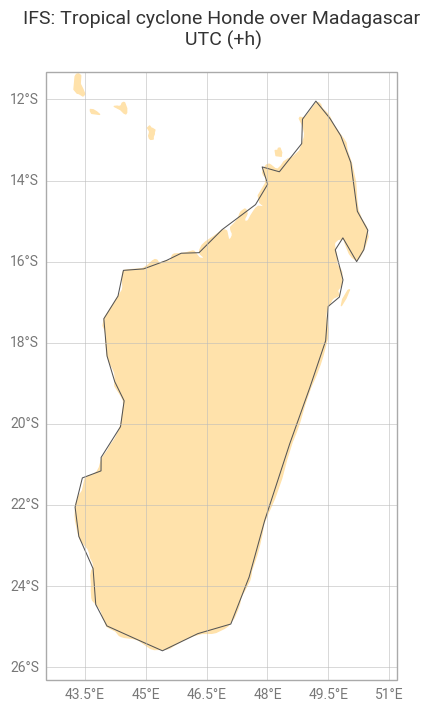

In [13]:
chart = ekp.Map(domain="Madagascar")

#chart.contour(df,
              ##levels={"step": 4, "reference": 1000},
              #linecolors="black",
              ##linewidths=[0.5, 1, 0.5, 0.5],
              ##labels = True,
              #legend_style = None,
              ##transform_first=True)

chart.land(color="#ffe2ab")
chart.coastlines(resolution="low")
chart.gridlines()

chart.title(
    "IFS: Tropical cyclone Honde over Madagascar\n"
    "{base_time:%Y-%m-%d %H} UTC (+{lead_time}h)\n",
    fontsize=14, horizontalalignment="center",
)
chart.save(f"./plots/{''.join(PARAM_SFC)}_{MODEL}_{DATES[0]}{TIME}-{STEPS}h.png")
chart.show()

_To be continued_